In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import combinations, product

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [28]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [52]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [30]:
df['default.payment.next.month'].value_counts() #77.88%

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [31]:
df['default.payment.next.month'].unique()

array([1, 0])

In [32]:
y = df['default.payment.next.month'].copy()
X = df.copy().drop('default.payment.next.month', axis = 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=895)

In [35]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 72.535%


In [36]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=268)

In [37]:

param_grid = {'max_depth': np.arange(2,10),
              'min_samples_split' : np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,21,2),
             'random_state': [42]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

# обучим модель
%time grid_tree.fit(X_train, y_train)

# посмотрим на лучшую модель
best_tree = grid_tree.best_estimator_
print(best_tree)
print("_"*40)
# результаты лучшей модели
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100,3)))
# результаты на тестовой выборке
predictions = best_tree.predict(X_test)
print("Test score: {}%".format(round(accuracy_score(y_true = y_test, y_pred = predictions) * 100,3)))

CPU times: user 19.4 s, sys: 2.66 s, total: 22.1 s
Wall time: 9min 14s
DecisionTreeClassifier(max_depth=3, random_state=42)
________________________________________
Cross-validated best score 82.149%
Test score: 81.909%


In [40]:
best_tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=42,
            splitter='best')

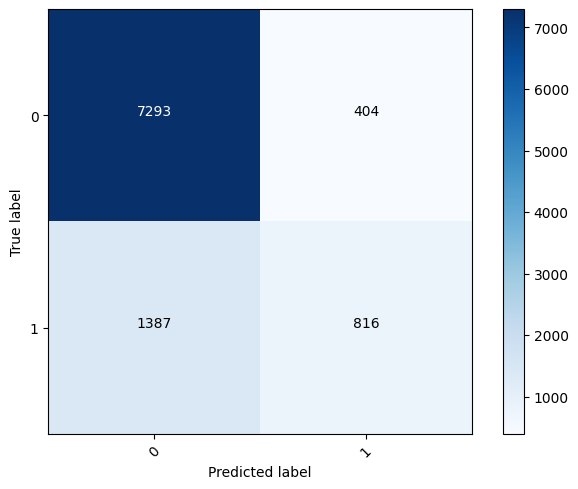

In [41]:
cm = confusion_matrix(y_test, predictions)
cmap = plt.cm.Blues
classes = [0,1]
thresh = cm.max() / 2.
fmt = 'd'

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

In [42]:
target_names = ['Not Default', 'Default']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

 Not Default       0.83      0.81      0.82      7697
     Default       0.39      0.42      0.40      2203

    accuracy                           0.73      9900
   macro avg       0.61      0.62      0.61      9900
weighted avg       0.73      0.73      0.73      9900



In [45]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=13, random_state=42)

In [46]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

In [47]:
get_feature_importance(best_tree, X.columns).head(10)

,feat,score
6,PAY_0,0.762688
7,PAY_2,0.152689
19,PAY_AMT2,0.048293
10,PAY_5,0.017876
12,BILL_AMT1,0.011502
0,ID,0.006951
5,AGE,0.000000
4,MARRIAGE,0.000000
22,PAY_AMT5,0.000000
21,PAY_AMT4,0.000000


PAY_0 -- самый важный признак, так как в различных отраслях существуют сезонные изменения, которые влияют на поведение и тенденции. Например, в определенных месяцах спрос на кридетные карты может быть выше или ниже из-за таких факторов, как начало учебного года, праздники, налоговый сезон и т.д.

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, best_tree.predict_proba(X_train)[:, 1])

0.7330153205076252

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, best_tree.predict_proba(X_test)[:, 1])

0.7212167894878724

[Text(0.5, 0.875, 'x[6] <= 1.5\ngini = 0.344\nsamples = 20100\nvalue = [15667, 4433]'),
 Text(0.25, 0.625, 'x[7] <= 0.5\ngini = 0.276\nsamples = 18012\nvalue = [15032, 2980]'),
 Text(0.125, 0.375, 'x[19] <= 794.0\ngini = 0.243\nsamples = 16429\nvalue = [14101, 2328]'),
 Text(0.0625, 0.125, 'gini = 0.347\nsamples = 3797\nvalue = [2947, 850]'),
 Text(0.1875, 0.125, 'gini = 0.207\nsamples = 12632\nvalue = [11154, 1478]'),
 Text(0.375, 0.375, 'x[10] <= 1.0\ngini = 0.484\nsamples = 1583\nvalue = [931, 652]'),
 Text(0.3125, 0.125, 'gini = 0.462\nsamples = 1100\nvalue = [701, 399]'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 483\nvalue = [230, 253]'),
 Text(0.75, 0.625, 'x[12] <= 577.0\ngini = 0.423\nsamples = 2088\nvalue = [635, 1453]'),
 Text(0.625, 0.375, 'x[0] <= 20585.0\ngini = 0.462\nsamples = 69\nvalue = [44, 25]'),
 Text(0.5625, 0.125, 'gini = 0.334\nsamples = 52\nvalue = [41, 11]'),
 Text(0.6875, 0.125, 'gini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.875, 0.375, 'x[10] <=

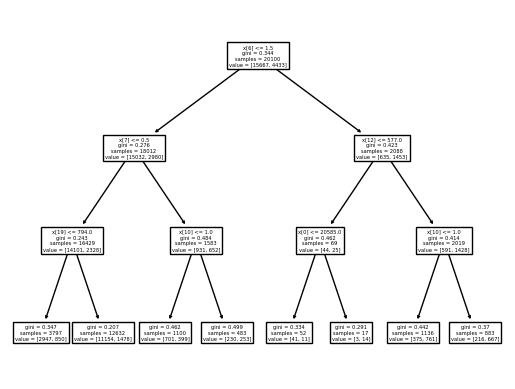

In [51]:
from sklearn import tree
tree.plot_tree(best_tree)